1-Download the MNIST dataset and import it :

In [1]:
# this part is used to convert our mnist .gz files to .csv , then we will upload the .csv files 

In [5]:
def convert(imgf, labelf, outf, n):
    f = open(imgf, "rb")
    o = open(outf, "w")
    l = open(labelf, "rb")

    f.read(16)
    l.read(8)
    images = []

    for i in range(n):
        image = [ord(l.read(1))]
        for j in range(28*28):
            image.append(ord(f.read(1)))
        images.append(image)

    for image in images:
        o.write(",".join(str(pix) for pix in image)+"\n")
    f.close()
    o.close()
    l.close()




In [7]:
convert("C:/Users/ELMAATAOUI OUSSAMA/Desktop/train-images-idx3-ubyte.gz", 'C:/Users/ELMAATAOUI OUSSAMA/Desktop/train-labels-idx1-ubyte.gz',
        "mnist_train.csv", 60000)
convert("C:/Users/ELMAATAOUI OUSSAMA/Desktop/t10k-images-idx3-ubyte.gz", "C:/Users/ELMAATAOUI OUSSAMA/Desktop/t10k-labels-idx1-ubyte.gz",
        "mnist_test.csv", 10000)


Now that we converted the gz files to csv we will work with the csv forms :

In [1]:
import numpy as np
import csv
X_trainMNIST=[]
Y_trainMNIST=[]
with open('C:/Users/ELMAATAOUI OUSSAMA/Desktop/mnist_train.csv', 'r') as f:
    reader = csv.reader(f)
    
    for row in reader:
        X_trainMNIST+=row[1:]
        Y_trainMNIST+=row[0]
        
        
X_trainMNIST=[int(x) for x in X_trainMNIST]
X_trainMNIST=np.array(X_trainMNIST).reshape(60000,784)
Y_trainMNIST=[int(x) for x in Y_trainMNIST]

X_testMNIST=[]
Y_testMNIST=[]
with open('C:/Users/ELMAATAOUI OUSSAMA/Desktop/mnist_test.csv', 'r') as f:
    reader = csv.reader(f)
    
    for row in reader:
        X_testMNIST+=row[1:]
        Y_testMNIST+=row[0]
        
        
X_testMNIST=[int(x) for x in X_testMNIST]
X_testMNIST=np.array(X_testMNIST).reshape(10000,784)
Y_testMNIST=[int(x) for x in Y_testMNIST]



Download the Cifar dataset and import it :

In [2]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict


databatch1=unpickle('C:/Users/ELMAATAOUI OUSSAMA/Desktop/cifar-10-batches-py/data_batch_1')
databatch2=unpickle('C:/Users/ELMAATAOUI OUSSAMA/Desktop/cifar-10-batches-py/data_batch_2')
databatch3=unpickle('C:/Users/ELMAATAOUI OUSSAMA/Desktop/cifar-10-batches-py/data_batch_3')
databatch4=unpickle('C:/Users/ELMAATAOUI OUSSAMA/Desktop/cifar-10-batches-py/data_batch_4')
databatch5=unpickle('C:/Users/ELMAATAOUI OUSSAMA/Desktop/cifar-10-batches-py/data_batch_5')
batchmeta=unpickle('C:/Users/ELMAATAOUI OUSSAMA/Desktop/cifar-10-batches-py/batches.meta')
testbatch=unpickle('C:/Users/ELMAATAOUI OUSSAMA/Desktop/cifar-10-batches-py/test_batch')

import numpy as np
X_trainbatch1CIFAR=np.array([[int(databatch1[b'data'][k][j]) for j in range(len(databatch1[b'data'][0]))] for k in range(len(databatch1[b'data']))])
Y_trainbatch1CIFAR=np.array([int(databatch1[b'labels'][k])  for k in range(len(databatch1[b'labels']))])
X_testCIFAR=np.array([[int(testbatch[b'data'][k][j]) for j in range(len(testbatch[b'data'][0]))] for k in range(len(testbatch[b'data']))])
Y_testCIFAR=[int(testbatch[b'labels'][k])  for k in range(len(testbatch[b'labels']))]


In [3]:
Xbatch1=[[int(databatch1[b'data'][k][j]) for j in range(len(databatch1[b'data'][0]))] for k in range(len(databatch1[b'data']))]
Xbatch2=[[int(databatch2[b'data'][k][j]) for j in range(len(databatch2[b'data'][0]))] for k in range(len(databatch2[b'data']))]
Xbatch3=[[int(databatch3[b'data'][k][j]) for j in range(len(databatch3[b'data'][0]))] for k in range(len(databatch3[b'data']))]
Xbatch4=[[int(databatch4[b'data'][k][j]) for j in range(len(databatch4[b'data'][0]))] for k in range(len(databatch4[b'data']))]
Xbatch5=[[int(databatch5[b'data'][k][j]) for j in range(len(databatch5[b'data'][0]))] for k in range(len(databatch5[b'data']))]

Ybatch1=[int(databatch1[b'labels'][k])  for k in range(len(databatch1[b'labels']))]
Ybatch2=[int(databatch2[b'labels'][k])  for k in range(len(databatch2[b'labels']))]
Ybatch3=[int(databatch3[b'labels'][k])  for k in range(len(databatch3[b'labels']))]
Ybatch4=[int(databatch4[b'labels'][k])  for k in range(len(databatch4[b'labels']))]
Ybatch5=[int(databatch5[b'labels'][k])  for k in range(len(databatch5[b'labels']))]


In [65]:
totalX=np.array(Xbatch1+Xbatch2+Xbatch3+Xbatch4+Xbatch5)
totalY=np.array(Ybatch1+Ybatch2+Ybatch3+Ybatch4+Ybatch5)

2-Comment on the distribution of class labels and the dimensionality of the input and how these may affect the analysis.

In [25]:
import numpy
import matplotlib.pyplot as plt

In [3]:
len(X_trainMNIST[0])

784

In [7]:
len(X_trainbatch1CIFAR[0])

3072

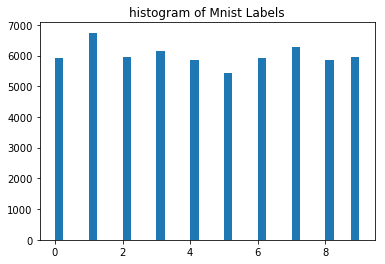

In [42]:
plt.hist(Y_trainMNIST,bins='auto')
plt.title("histogram of Mnist Labels")
plt.show()

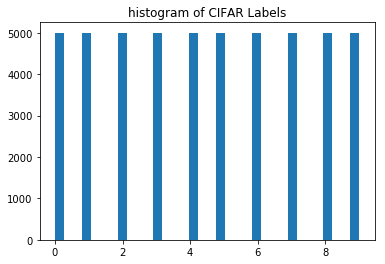

In [43]:
plt.hist(totalY,bins='auto')
plt.title("histogram of CIFAR Labels")
plt.show()

-We have a training data of 60000 elements and 784 features for Mnist and 50000 elements for Cifar separated into mini batches with 3072 features . We can assume that training Cifar will take much more time since it has many features comparing to Mnist .

-We can see that the labels of Cifar are distributed uniformaly i.e. the probability of one label is equal to the other while Mnist has a non uniform distribution , this will probably affect the bayesian training when introducing the prior , it would have more effect for Mnist than Cifar .


3.Classification

3-a-Naive Bayesian :

Our algorithm will calculate the log of posterior instead of posterior in order not to get null values when calculating with Python that considers 0.00000000..1= 0

3-b- One clear negatif feature for the naive bayesian is that since naive Bayes naively multiplies all the feature likelihoods together, zero probabilities in the likelihood term for any class will cause the probability of the class to be zero, no matter the other evidence , adding to that the fact that it assumes STRONG independance which is usually not the case , that is why it is considered naive .A naive Bayesian classifier assumes that the existence of a characteristic for a class is independent of the existence of other characteristics .
A positif feature for this classifier is that it is easy to implement and the concept is simple using directly a bayesian classification based on the Bayes theorem . It is also fast when running with a low complexity .

3-c We will the classical way of representing our data which consists on puting all the train images in a matrix called Xtrain and the labels of those images respectively in a column vector Ytrain , Xtrain and Ytrain will then have the same number of lines ; each line in Xtrain is associated to a label in Ytrain . Our classification algorithms will take Xtrain and Ytrain to train the model and then test it on Xtest and Ytest . This modelisation will be used for both MNIST and Cifar .

3-d- Applying classifier :

We have decided to work with the log likelihood of the gaussian distribution in order not to get very low values that could be considered as null for python , the prior doesn't affect the classifying for Cifar since it is distributed uniformally , however it should be calculated for MNIST since it is not uniform . 

In [46]:


import csv
import random
import math
 
def mean(numbers):
    return sum(numbers)/float(len(numbers))
 
def stdev(numbers):
    avg = mean(numbers)
    variance = sum([pow(x-avg,2) for x in numbers])/float(len(numbers)-1)
    return math.sqrt(variance)

def calculateProbability(x, mean, stdev):
    if stdev==0:
        return 1
    else:
        
        return -math.log((math.sqrt(2*math.pi) * stdev))-(math.pow(x-mean,2)/(2*math.pow(stdev,2)))

In [47]:
def createdictionaryofclasses(dataset,labels):
    classesdictio = {}
    for i in range(len(dataset)):
        ourvector = dataset[i]
        ourlabel= labels[i]
        if (ourlabel not in classesdictio):
            classesdictio[ourlabel] = []
        classesdictio[ourlabel].append(ourvector)
    return classesdictio

def classproba(dataset,labels,classValue):
    classesdictio=createdictionaryofclasses(dataset,labels)
    return -math.log((len(dataset)/len(classesdictio[classValue])))


#we should include as i said before multiplying by the prior for the mnist data since it is not
#distributed uniformaly .

classprobalist=[classproba(X_trainMNIST,Y_trainMNIST,classValue) for classValue in range(10)]


def calculate_mean_sdev(dataset):
    result = [(mean(x), stdev(x)) for x in zip(*dataset)]
    return result
 
def calculate_mean_sdev_all_labels(dataset,labels):
    classesdictio = createdictionaryofclasses(dataset,labels)
    result = {}
    for label, elements in classesdictio.items():
        result[label] = calculate_mean_sdev(elements)
    return result

In [106]:
def calculate_Class_Probabilities(result,ourvector):
    probabilities = {}
    for label, meansdevelements in result.items():
        
        probabilities[label] = classprobalist[int(label)]# 0 if we are working with cifar 

        for i in range(len(meansdevelements)):
            mean, stdev = meansdevelements[i]
            x = ourvector[i]
            probabilities[label] += calculateProbability(x, mean, stdev)
    return probabilities
def maxdictio(probabilities):
    s=probabilities[0]
    index=0
    for k in range(len(probabilities)):
        if probabilities[k]>s :
            s=probabilities[k]
            index=k
    return index
    

def Predictions(result, vectors):
    predictions = []
    for i in range(len(vectors)):
        probabilities = calculate_Class_Probabilities(result, vectors[i])
        labelprediction =maxdictio(probabilities)
        predictions.append(labelprediction)
    return predictions

For Mnist data :

In [51]:
result = calculate_mean_sdev_all_labels(X_trainMNIST,Y_trainMNIST)
predictions= Predictions(result,X_testMNIST)

Accuracy evaluation :

In [103]:
s=0
for k in range(len(Y_testMNIST)):
    if predictions[k]==Y_testMNIST[k] :
        s+=1
print("accuracy :",(s/float(len(Y_testMNIST)))*100)

accuracy : 62.160000000000004


Test loglikelihood evaluation :

For Cifar Data :

In [109]:
resultcifar = calculate_mean_sdev_all_labels(totalX,totalY)

In [110]:
predictions= Predictions(resultcifar,X_testCIFAR)

Accuracy evaluation : 

In [111]:
s=0
for k in range(len(Y_testCIFAR)):
    if predictions[k]==Y_testCIFAR[k] :
        s+=1
print("accuracy :",(s/float(len(Y_testCIFAR)))*100)

accuracy : 29.759999999999998


Test loglikelihood evaluation :

e- Confusion Matrix :

In [55]:
import numpy as np
def confusion_Matrix(testSet,predictions):
    confusionMatrix=np.array([[0]*(int(max(predictions))+1) for i in range (0,(int(max(predictions))+1))]) #Initializing the confusion matrix
    for i in range (len(testSet)):
        confusionMatrix[testSet[i]][predictions[i]]+=1
    return confusionMatrix

Mnist : 

In [105]:
confusion_Matrix(Y_testMNIST,predictions)

array([[ 882,    1,    3,    4,    3,    8,   29,    1,   33,   16],
       [   0, 1090,    1,    2,    0,    1,    9,    0,   30,    2],
       [  47,   32,  416,   83,    7,    2,  208,    7,  215,   15],
       [  21,   43,    9,  558,    3,    4,   38,   10,  239,   85],
       [  14,    7,    7,    2,  307,    9,   52,    9,  125,  450],
       [  72,   32,    4,   32,   10,   95,   34,    5,  522,   86],
       [  12,   16,    6,    0,    1,    8,  888,    0,   26,    1],
       [   0,   16,    4,   12,    7,    3,    4,  375,   34,  573],
       [  14,   91,    4,   12,    6,   15,   11,    6,  669,  146],
       [   6,   12,    3,    8,    6,    1,    1,   18,   18,  936]])

Cifar :

In [112]:
confusion_Matrix(Y_testCIFAR,predictions)

array([[494,  20,  39,  10,  85,  34,  50,   9, 199,  60],
       [141, 166,  24,  31,  66,  72, 192,  19, 121, 168],
       [225,  24,  83,  15, 292,  48, 209,  21,  54,  29],
       [163,  36,  54,  76, 151, 129, 262,  26,  34,  69],
       [ 86,   8,  57,  26, 417,  38, 265,  22,  50,  31],
       [156,  17,  55,  51, 167, 264, 159,  36,  57,  38],
       [106,   2,  60,  18, 228,  46, 467,  15,  19,  39],
       [134,  24,  36,  41, 228,  94, 102, 131,  72, 138],
       [168,  41,  18,  17,  56,  83,  39,   8, 471,  99],
       [144,  67,  17,  20,  48,  32, 101,  23, 141, 407]])

3-f- We can notice that for MNIST we got an accuracy of 62,16% and we got 29,76% for cifar , we would like to compare it to a classifier outputing random class labels . If we want to classify a certain image randomly , knowing that there are 10 possible labels , we have 10% chance (accuracy) to take a good decision , we can then see clearly that our classifier for both models is a way better than the random classifier by providing a higher accuracy. Ways to improve performance would be to apply for example 5 cross validation for cifar data since we have 5 available training batches , that would probably improve accuracy ,training for more data would also improve performance , an other way would be to consider working on a model that considers the different patches in an image such as convolutional neural networks where we apply a filter into the image to learn each area in it and therefore get a very high accuracy at the end .

Linear bayesian regression

a- Implementation :

In [6]:
import numpy as np
from numpy import linalg as LA
from numpy.random import multivariate_normal


class BayesianLinearRegression:
 
    def __init__(self, lamb=20., beta_mu=0, sigma=1, fit_intercept=True):
        if not np.isscalar(lamb):
            self.inv_lamb = 1./np.asarray(lamb)
        else:
            self.inv_lamb = 1./float(lamb)
        if not np.isscalar(beta_mu):
            self.beta_mu  = np.asarray(beta_mu)
        else:
            self.beta_mu = float(beta_mu)

        self.sigma = sigma
        self.fit_intercept = fit_intercept
    
    
    def add_intercept(self, X):
        X_new = np.ones((X.shape[0],X.shape[1]+1), dtype=X.dtype)
        X_new[:,1:] = X[:,:]
        return X_new

    def fit_map(self, X, y, full_posterior=True):
        if self.fit_intercept:
            X = self.add_intercept(X)
    #data setup
        f_dim = X.shape[1]
        if np.isscalar(self.inv_lamb):
            inv_lamb = np.diagflat(np.repeat(self.inv_lamb,f_dim))
        else:
            inv_lamb = np.diagflat(self.inv_lamb)
        if np.isscalar(self.beta_mu):
            beta_mu = np.repeat(self.beta_mu,f_dim)
        else:
            beta_mu = self.beta_mu
        sigma = self.sigma
    #let the actual calculation begin
        l = sigma**2 * inv_lamb
        s = LA.inv(X.T.dot(X)+l)
    # adding in the mean of the prior
        b0 = sigma**2 * inv_lamb.dot(beta_mu)

        self.beta = s.dot(X.T.dot(y) + b0)
        if full_posterior:
            self.Sigma = sigma * sigma * s

    def predict(self, X):
        if self.fit_intercept:
            X = self.add_intercept(X)
        return X.dot(self.beta)
    #int(round(X.dot(self.beta))

4-b/4-c/4-d/ For Mnist data: 

4-b(Mnist) :

In [7]:
clf = BayesianLinearRegression(fit_intercept=False)
clf.fit_map(X_trainMNIST,Y_trainMNIST)

In [8]:
Ypredicted=[clf.predict(X_testMNIST[k]) for k in range(len(Y_testMNIST))]

4-c(Mnist):

In order to answer this question , we will visualize at first the different points that were predicted using the regression for each class (0-9) , in the abscisse .

In [45]:
def createdictionaryofclasses(dataset,labels):
    classesdictio = {}
    for i in range(len(dataset)):
        ourvector = dataset[i]
        ourlabel= labels[i]
        if (ourlabel not in classesdictio):
            classesdictio[ourlabel] = []
        classesdictio[ourlabel].append(ourvector)
    return classesdictio

In [47]:
dictio_of_classes = createdictionaryofclasses(Ypredicted,Y_testMNIST)

In [66]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
for k in range(10):
    ax.scatter([[k]*len(dictio_of_classes[k])],dictio_of_classes[k])

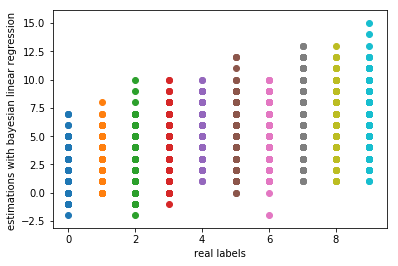

In [67]:
plt.xlabel('real labels')
plt.ylabel('estimations with bayesian linear regression ')
plt.show()

We can see that when the real label of the image is 0 , we get using our regression model values going from -2.5 into 7.5 which is an intervalle of size 10 , for 1 the intervalle is smaller , then much higher for 2 

Let us now simply plot for each prediction the predicted value using regression and the real label in the same vertical line . We will only plot 50 values .

In [224]:
import matplotlib.pyplot as plt
x =np.linspace(0,100,50)
y = Ypredicted[:50]
z =Y_testMNIST[:50]

fig1 = plt.figure(figsize=(20,10))
plt.scatter(x,y)
plt.scatter(x,z)


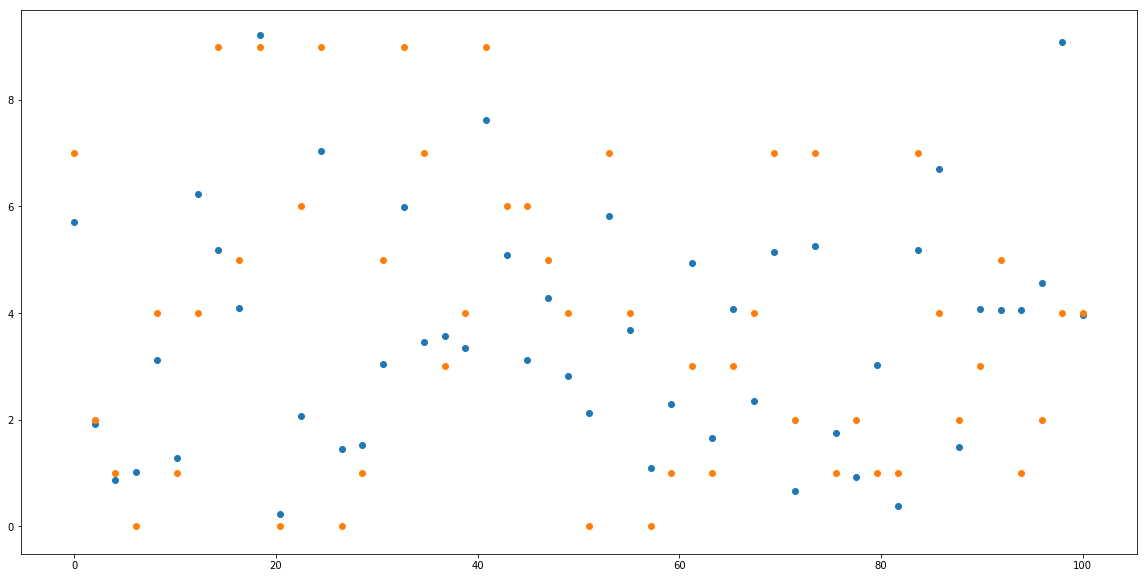

In [225]:
plt.show()

There are points that are extremely far from their predictions .

Mean square error :

In [74]:
def mse(X,y,clf):
    d = y-clf.predict(X)
    return 1/float(len(y)) * d.T.dot(d)

In [244]:
mse(X_testMNIST,Y_testMNIST,clf)

3.5674281360997138

Even if many points are very far from their prediction using our regression model , we still have a low mean square error because we guess that our algorithm still makes a good prediction for many points , we will get to see this when calculating the accuracy of the model later .

4-d(Mnist) :

A way to discretize data would be to use int(round(prediction which will take the nearest int to the float value , since there are values that will go out of our possible labels 0-9 , we decided to assign all the values under 0 to 0 and all the ones over 9 to 9 

In [22]:
Ypredicted=[int(round(clf.predict(X_testMNIST[k]))) for k in range(len(Y_testMNIST))]

In [36]:
Ypredictedadapted=[]
for k in range(len(Ypredicted)):
    if Ypredicted[k]>9:
        Ypredictedadapted+=[9]
    elif Ypredicted[k]<0:
        Ypredictedadapted+=[0]
    else :
        Ypredictedadapted+=[Ypredicted[k]]

Accuracy :

In [37]:
s=0
for k in range(len(Y_testMNIST)):
    if Ypredictedadapted[k]==Y_testMNIST[k] :
        s+=1
print((s/len(Y_testMNIST))*100)

25.580000000000002


Confusion Matrix :

In [86]:
import numpy as np
def confusion_Matrix(testSet,predictions):
    confusionMatrix=np.array([[0]*(max(predictions)+1) for i in range (0,(max(predictions)+1))]) #Initializing the confusion matrix
    for i in range (len(testSet)):
        confusionMatrix[testSet[i]][predictions[i]]+=1
    return confusionMatrix

In [38]:
confusion_Matrix(Y_testMNIST,Ypredictedadapted)

array([[342, 330, 177,  72,  37,  17,   2,   3,   0,   0],
       [ 19, 483, 380, 149,  64,  27,   9,   3,   1,   0],
       [ 45, 133, 240, 284, 212,  88,  19,   8,   1,   2],
       [ 10,  55, 199, 302, 232, 124,  51,  20,  12,   5],
       [  0,   3,  24,  89, 233, 294, 193,  99,  33,  14],
       [  2,  16,  70, 164, 209, 223, 125,  45,  21,  17],
       [  2,  15,  38,  90, 175, 222, 195, 138,  60,  23],
       [  0,   4,  22,  47,  91, 194, 211, 193, 139, 127],
       [  0,   5,   5,  38,  99, 163, 225, 208, 130, 101],
       [  0,   2,   7,  19,  35,  71, 168, 258, 232, 217]])

4-b/4-c/4-d/ for CIFAR data :

4-b(Cifar) :

In [68]:
clf = BayesianLinearRegression(fit_intercept=False)
clf.fit_map(totalX,totalY)

In [83]:
Ypredicted=[clf.predict(X_testCIFAR[k]) for k in range(len(Y_testCIFAR))]

In [85]:
Ypredicted[0:20]

[2.9128207341970329,
 5.6560390443037623,
 5.0461481365691148,
 4.8217614178649537,
 6.3329020027185514,
 3.396924453015175,
 2.2042228183754378,
 2.952452600106418,
 3.5534942068511013,
 5.1309938256695604,
 3.0213648937417323,
 6.8319780487086641,
 3.0133034510297492,
 3.5963824520732963,
 2.9364065331913416,
 2.6552232772691875,
 3.1868131456152082,
 4.0213047000110516,
 5.9991003452355454,
 6.5102060569343063]

4-c(CIFAR): We will proceed the same way as for MNIST :

In [70]:
dictio_of_classesCIFAR = createdictionaryofclasses(Ypredicted,Y_testCIFAR)

In [71]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
for k in range(10):
    ax.scatter([[k]*len(dictio_of_classesCIFAR[k])],dictio_of_classesCIFAR[k])

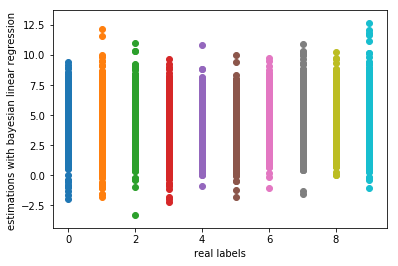

In [72]:
plt.xlabel('real labels')
plt.ylabel('estimations with bayesian linear regression ')
plt.show()

The predictions using our regression model for the class 0 for example go from -2.3 untill almost 10 , we get a higher intervalle for 1 and for the others label in general , but as I mentionned before , this graph doesn't allow us to guess the accuracy of the model since we can get for example for the class 0 100 predictions that are different from 0 covering all the intervalle [-2.3,10] and still get a good accuracy because many of the predictions are equal to 0 .

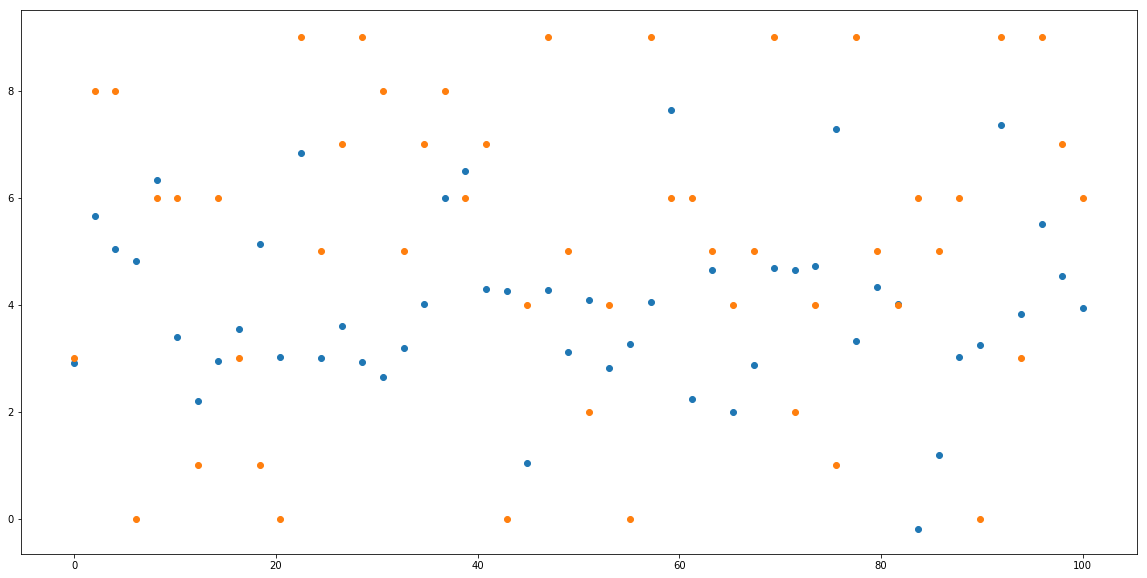

In [9]:
import matplotlib.pyplot as plt
x =np.linspace(0,100,50)
y = Ypredicted[:50]
z =Y_testCIFAR[:50]

fig2 = plt.figure(figsize=(20,10))
plt.scatter(x,y)
plt.scatter(x,z)
plt.show()

we can see from this graph that for CIFAR , many predictions are very far away from the real label of the image , we guess that we will have a higher mean square error than for MNIST .

In [75]:
mse(X_testCIFAR,Y_testCIFAR,clf)

9.4730989104348016

4-d (CIFAR)

A way to discretize data would be to use int(round(prediction which will take the nearest int to the float value , since there are values that will go out of our possible labels 0-9 , we decided to assign all the values under 0 to 0 and all the ones over 9 to 9 

In [76]:
Ypredicted=[int(round(clf.predict(X_testCIFAR[k]))) for k in range(len(Y_testCIFAR))]

In [77]:
Ypredictedadapted=[]
for k in range(len(Ypredicted)):
    if Ypredicted[k]>9:
        Ypredictedadapted+=[9]
    elif Ypredicted[k]<0:
        Ypredictedadapted+=[0]
    else :
        Ypredictedadapted+=[Ypredicted[k]]

Accuracy :

In [79]:
s=0
for k in range(len(Y_testCIFAR)):
    if Ypredictedadapted[k]==Y_testCIFAR[k] :
        s+=1
print((s/len(Y_testCIFAR))*100)

11.27


We get a very low accuracy for CIFAR which can even be compared to the random classifier , which is normal because we have much more features for CIFAR (3072) than MNIST (784), we guess that we can not model 3072 features (those of cifar especially) using a bayesian linear regression model , we also guess that we will have an underfitting when modeling . 

Confusion Matrix :

In [80]:
import numpy as np
def confusion_Matrix(testSet,predictions):
    confusionMatrix=np.array([[0]*(max(predictions)+1) for i in range (0,(max(predictions)+1))]) #Initializing the confusion matrix
    for i in range (len(testSet)):
        confusionMatrix[testSet[i]][predictions[i]]+=1
    return confusionMatrix

In [82]:
confusion_Matrix(Y_testCIFAR,Ypredictedadapted)

array([[ 11,  30,  90, 177, 240, 246, 130,  57,  14,   5],
       [ 23,  46, 115, 173, 213, 222, 120,  57,  20,  11],
       [ 13,  29, 105, 215, 258, 213, 112,  33,  13,   9],
       [ 21,  40, 109, 224, 253, 201,  94,  38,  15,   5],
       [  7,  45, 117, 206, 256, 225,  99,  31,  11,   3],
       [  9,  25,  89, 194, 257, 226, 140,  48,  10,   2],
       [  3,  22,  85, 219, 260, 217, 121,  48,  20,   5],
       [  5,  17,  67, 155, 222, 215, 178,  91,  31,  19],
       [  3,  15,  35, 126, 241, 282, 194,  70,  23,  11],
       [  8,  21,  57, 108, 185, 239, 197, 117,  44,  24]])

4-e :

For Mnist data with 784 features , the regression bayesian linear  gives 25.5% accuracy which is better than the random classifier comparing to Cifar data with 3072 features where the accuracy result is awfull , indeed with our linear model we can get an underfitting , therefore a bad performance in both train and test data since the linear model doesn't model efficiently our dataset .

An other problem is that when trying to classify using regression , we may get as labels values that are not in the possible labels like when we had the value of 9.7 in the regression which gave us the value of 10 in the label knowing that the possible labels are 0-9 . So we had to replace those values by their nearest integer in (0-9) bu this way we are loosing information on data and we may be choosing a bad classifying , since not all the images with the prediction label over 9 have the value 9 as their real label , therefore the regression model that leads to discretizing is not that efficient .

4-f:
One limitation is that most of the time the prediction is not an integer , and when trying to discretize  our predictions we assume that the right prediction is the nearest integer which is not the best thing to do here especially because sometimes we may even get predictions out of our possible labels 0-9 and by assigning them to the nearest integer in this interval (either 0 or 9 ) we may be loosing much information .
